In [45]:
import numpy as np
from numpy import random as rd
import matplotlib.pyplot as plt

In [46]:
n = 4
ub = np.ones(n)*100
lb = np.zeros(n)
best = []

In [47]:
def fit(x):
    z = x[0]*2 - 4*x[1] + 5*x[2] - 6*x[3]
    lhs1 = x[0] + 4*x[1] - 2*x[2] + 8*x[3]
    lhs2 = -x[0] + 2*x[1] + 3*x[2] + 4*x[3]
    rhs1 = 2
    rhs2 = 1
    d1 = lhs1-rhs1
    d2 = lhs2-rhs2
    # print(z, lhs1, lhs2, d1,d2)
    if d1 > 0:
        z = z - 1000*d1
    if d2 > 0:
        z = z - 1000*d2
    return z

In [48]:
fit([100,-0,100,-0])

-198300

In [49]:
class Wolf:
    def __init__(self, dvar=[]):
        if (len(dvar)!=0):
            self.dvar = dvar
        else:
            self.dvar = rd.random(n)*100
        self.fitness = 0
    
    def calc_fitness(self):
        # self.fitness = self.dvar[0]**2 - 10*np.cos(2*np.pi*self.dvar[0]) + self.dvar[1]**2 -10*np.cos(2*np.pi*self.dvar[1])
        # this.fitness = Math.pow(this.position.x,2) - 10*Math.cos(2*Math.PI * this.position.x) + Math.pow(this.position.y,2) - 10*Math.cos(2*Math.PI*this.position.y)
        # x = self.dvar[0]
        # y = self.dvar[1]
        # self.fitness = (0.002*(x-50)**2 - 100 * np.cos(0.02 * np.pi * (x-50))) + (0.002*(y-50)**2 - 100 * np.cos(0.02 * np.pi * (y-50))) + 200
        self.fitness = fit(self.dvar)


In [50]:
#init
pop_size = 200
population = []
alpha = Wolf()
beta  = Wolf()
gamma = Wolf()
alpha.calc_fitness()
beta.calc_fitness()
gamma.calc_fitness()

for i in range(pop_size):
    population.append(Wolf())
    population[i].calc_fitness()
    # print(population[i].fitness)
    if population[i].fitness>alpha.fitness:
        alpha, population[i] = population[i], alpha
    elif population[i].fitness>beta.fitness:
        beta, population[i] = population[i], beta
    elif population[i].fitness>gamma.fitness:
        gamma, population[i] = population[i], gamma

print('alpha:', alpha.fitness)
print('beta: ', beta.fitness)
print('gamma:', gamma.fitness)

alpha: -147793.54051250266
beta:  -175680.7581988788
gamma: -212145.14338373876


In [51]:
alpha.dvar

array([30.40140194, 14.15206514, 50.04600402,  0.25142903])

In [52]:
a = 2
max_iter = 200
da = (a)/max_iter

it = 1
while it<=2*max_iter:
    print("Iteration", it)
    print("Best:", alpha.fitness)
    best.append(alpha.fitness)
    new_alpha = alpha
    new_beta = beta
    new_gamma = gamma
    for i in range(pop_size):
        A1 = a * (2 * rd.random() - 1)
        A2 = a * (2 * rd.random() - 1)
        A3 = a * (2 * rd.random() - 1)
        C1, C2, C3 = 2 * rd.random(), 2*rd.random(), 2*rd.random()
        X1 = alpha.dvar - A1 * abs(C1 * alpha.dvar-population[i].dvar)
        X2 = beta.dvar - A3 * abs(C2 * beta.dvar-population[i].dvar)
        X3 = gamma.dvar - A3 * abs(C3 * gamma.dvar-population[i].dvar)
        population[i].dvar = (X1+X2+X3)/3
        population[i].dvar = np.minimum(population[i].dvar, ub)
        population[i].dvar = np.maximum(population[i].dvar, lb)
        population[i].calc_fitness()
        if population[i].fitness > new_alpha.fitness:
            new_alpha, population[i] = population[i], new_alpha
        elif population[i].fitness > new_beta.fitness:
            new_beta, population[i] = population[i], new_beta
        elif population[i].fitness > new_gamma.fitness:
            new_gamma, population[i] = population[i], new_gamma
    alpha = new_alpha
    beta = new_beta
    gamma = new_gamma
    a = a-da
    it+=1



Iteration 1
Best: -147793.54051250266
Iteration 2
Best: 0.3150296624178755
Iteration 3
Best: 5.291696510747283
Iteration 4
Best: 7.451428222130234
Iteration 5
Best: 12.087018559585097
Iteration 6
Best: 12.101025665980682
Iteration 7
Best: 18.266986924131977
Iteration 8
Best: 18.266986924131977
Iteration 9
Best: 28.119418364661236
Iteration 10
Best: 29.495337563326196
Iteration 11
Best: 30.270307471748282
Iteration 12
Best: 30.62601179841324
Iteration 13
Best: 30.62601179841324
Iteration 14
Best: 30.62601179841324
Iteration 15
Best: 30.62601179841324
Iteration 16
Best: 30.62601179841324
Iteration 17
Best: 30.62601179841324
Iteration 18
Best: 30.62601179841324
Iteration 19
Best: 30.646858132087623
Iteration 20
Best: 30.68354683081664
Iteration 21
Best: 30.68354683081664
Iteration 22
Best: 30.68354683081664
Iteration 23
Best: 30.68354683081664
Iteration 24
Best: 30.68354683081664
Iteration 25
Best: 30.75324978570128
Iteration 26
Best: 30.75324978570128
Iteration 27
Best: 30.75324978570128

In [53]:
alpha.fitness

30.77698303278784

In [54]:
beta.dvar

array([7.95038477, 0.        , 2.97520392, 0.        ])

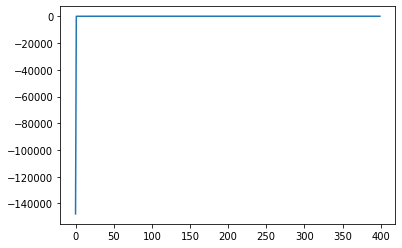

In [55]:
plt.plot(best)
plt.show()